#### 시퀀설 API를 사용하여 이미지 분류기 만들기(패션 MNIST)

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

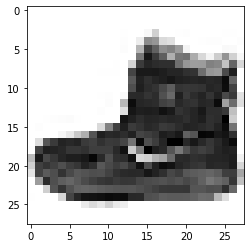

In [15]:
plt.imshow(X_train[0, :, :], cmap='Greys')

In [16]:
class_names = ['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']

In [17]:
X_train = X_train / 255.0 #표준화, 모든 X값이 정수가 아닌 0 ~ 1사이로 들어감  #(0~255) => (0.0 , 1.0)
X_test = X_test / 255.0

In [18]:
#MLP : 입력픙 => 은닉층1(300) => 은닉층2(100) => 출력층(10)
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape=[28,28]), 
                                     tf.keras.layers.Dense(300, activation='relu'), 
                                     tf.keras.layers.Dense(100, activation='relu'), 
                                     tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
#모형 컴파일 : 비용(손실) 함수, 최적화 알고리즘, 지표를 설정
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)
#epoch를 쓰면서 네트워크를 쓰는양을 정한다.

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7299 - accuracy: 0.7623 - val_loss: 0.5360 - val_accuracy: 0.8100
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4888 - accuracy: 0.8308 - val_loss: 0.4705 - val_accuracy: 0.8297
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4427 - accuracy: 0.8467 - val_loss: 0.4713 - val_accuracy: 0.8305
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4131 - accuracy: 0.8563 - val_loss: 0.4053 - val_accuracy: 0.8542
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3935 - accuracy: 0.8627 - val_loss: 0.3895 - val_accuracy: 0.8585
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3756 - accuracy: 0.8683 - val_loss: 0.3843 - val_accuracy: 0.8623
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3624 - accuracy: 0.8725 - val_loss: 0.3862 - val_accuracy:

In [21]:
import pandas as pd

<AxesSubplot:>

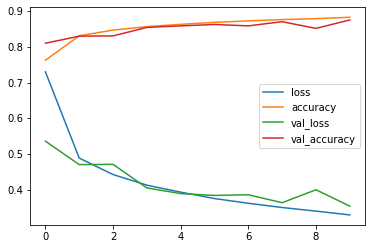

In [22]:
pd.DataFrame(history.history).plot()

In [23]:
model.predict(X_test[:3])

array([[9.8568598e-06, 4.3404634e-06, 1.9376139e-05, 2.6414978e-05,
        4.9891769e-06, 3.0093540e-02, 2.5204099e-05, 6.9652133e-02,
        2.0115399e-03, 8.9815259e-01],
       [1.2307816e-04, 1.0517397e-06, 9.8785514e-01, 4.1436442e-06,
        1.1723771e-03, 6.0695360e-09, 1.0826272e-02, 1.6511285e-10,
        1.7914470e-05, 6.3076699e-10],
       [5.5135988e-05, 9.9992657e-01, 6.7049059e-06, 8.3416926e-06,
        2.8966767e-06, 2.2040252e-09, 5.1639681e-08, 1.3585510e-07,
        1.5449670e-07, 8.0034884e-10]], dtype=float32)

In [24]:
import numpy as np

In [25]:
np.argmax(model.predict(X_test[:3]),axis=1)

array([9, 2, 1], dtype=int64)

In [26]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3777 - accuracy: 0.8656


[0.37768951058387756, 0.8655999898910522]

In [31]:
p = np.argmax(model.predict(X_test), axis=1)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test,p)

array([[871,   0,   8,  31,   1,   1,  72,   2,  14,   0],
       [  5, 964,   1,  23,   2,   0,   3,   0,   2,   0],
       [ 27,   2, 803,  13,  69,   0,  77,   0,   9,   0],
       [ 36,  10,   8, 889,  24,   0,  27,   0,   6,   0],
       [  0,   1, 141,  44, 721,   0,  84,   0,   9,   0],
       [  0,   0,   0,   1,   0, 926,   0,  52,   4,  17],
       [171,   1,  95,  30,  56,   1, 620,   0,  26,   0],
       [  0,   0,   0,   0,   0,  19,   0, 940,   0,  41],
       [  6,   1,   1,   7,   2,   1,   5,   7, 970,   0],
       [  0,   0,   0,   0,   0,   7,   0,  40,   1, 952]], dtype=int64)